In [19]:
    import numpy as np
    import math
    import pandas as pd
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy.interpolate import griddata
    from scipy.interpolate import interp2d
    from mpl_toolkits.basemap import Basemap
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import seaborn as sns
    import os
    import scipy.interpolate

In [20]:
#showing graphs within Python
%matplotlib inline

In [21]:
'''
Written by Chad Valencia, chadvalencia@gmail.com

for David Lindo Atichati, PhD, CUNY

The following takes two datasets of cyclonic and anticyclonic
eddies over a cross-section of the Pacific Ocean in the northern
hemisphere and forms a spatial distribution of
radius and amplitude; blue for cyclonic eddies
and red for anti-cyclonic eddies.


'''

'\nWritten by Chad Valencia, chadvalencia@gmail.com\n\nfor David Lindo Atichati, PhD, CUNY\n\nThe following takes two datasets of cyclonic and anticyclonic\neddies over a cross-section of the Pacific Ocean in the northern\nhemisphere and forms a spatial distribution of\nradius and amplitude; blue for cyclonic eddies\nand red for anti-cyclonic eddies.\n\n\n'

In [22]:
#importing Cyclonic and Anticyclonic datasets, run ETL-intervals ipynb first

### Half Degree (0.5) Precision

In [23]:
clldf = pd.read_csv('./data/cll500.csv')
alldf = pd.read_csv('./data/all500.csv')

In [24]:
clldf.head() #clldf is now half degree precision.

,eddy,latlon,eddy.1,date,lat,lon,lat2,lon2,radius,amplitude
0,1.0,"(26.5, 201.0)",1.0,4,26.594625,201.284855,26.5,201.0,20.28750,0.601725
1,2.0,"(30.5, 176.5)",2.0,10,30.796874,176.718651,30.5,176.5,40.30000,5.993165
2,2.0,"(30.5, 177.0)",2.0,10,30.651731,177.152112,30.5,177.0,25.36500,3.384120
3,2.0,"(31.0, 176.0)",2.0,8,31.233706,176.476311,31.0,176.0,33.90625,4.497819
4,2.0,"(31.5, 176.5)",2.0,4,31.573346,176.576569,31.5,176.5,27.13750,2.745743


In [25]:
alldf.head()

,eddy,latlon,eddy.1,date,lat,lon,lat2,lon2,radius,amplitude
0,1.0,"(16.5, 201.0)",1.0,2,16.616411,201.399742,16.5,201.0,29.9250,0.369896
1,1.0,"(16.5, 201.5)",1.0,4,16.677772,201.650513,16.5,201.5,32.6000,0.397567
2,2.0,"(19.5, 207.0)",2.0,4,19.908663,207.378414,19.5,207.0,32.0125,0.569734
3,2.0,"(19.5, 207.5)",2.0,10,19.831654,207.692059,19.5,207.5,28.1250,0.759498
4,3.0,"(30.0, 185.5)",3.0,2,30.068904,185.984230,30.0,185.5,58.7000,1.142662


In [26]:
crares = clldf.groupby('latlon') #creates a dataframe to make a heatmap for radius and amplitude for each bin
cra = crares.agg({
    'lat2':'first',
    'lon2':'first',
    'radius':np.mean,
    'amplitude':np.mean,
    'date':np.mean
})

In [27]:
arares = alldf.groupby('latlon') #creates a dataframe to make a heatmap for radius and amplitude for each bin
ara = arares.agg({
    'lat2':'first',
    'lon2':'first',
    'radius':np.mean,
    'amplitude':np.mean,
    'date':np.mean
})

In [28]:
cmax = crares.agg({
    'lat2':'first',
    'lon2':'first',
    'date':np.max
})

amax = arares.agg({
    'lat2':'first',
    'lon2':'first',
    'date':np.max
})

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1704: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


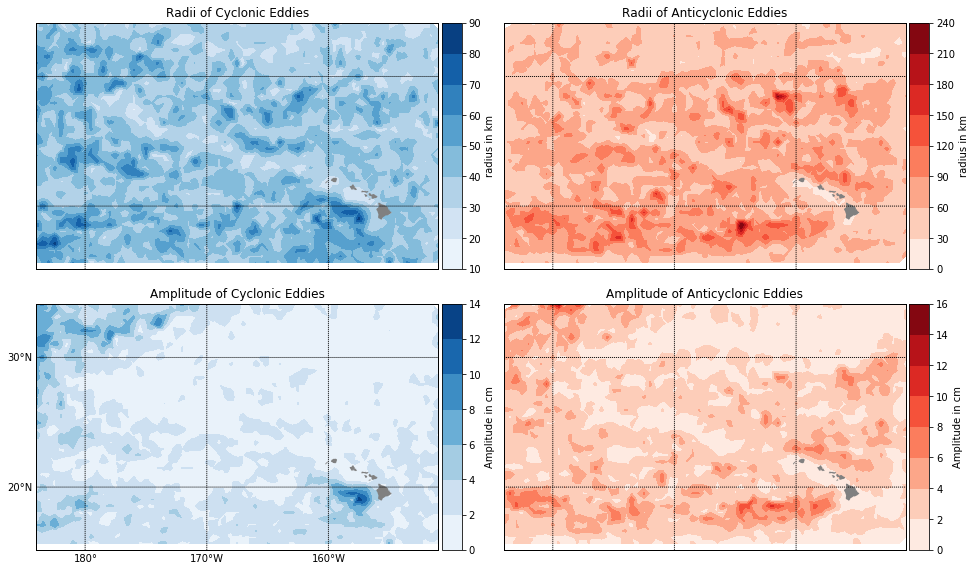

In [29]:
#testing smooth contour
#Consolidating all 4 graphs

clat = list(cra['lat2'])
clon = list(cra['lon2'])
crad = list(cra['radius'])
camp = list(cra['amplitude'])

alat = list(ara['lat2'])
alon = list(ara['lon2'])
arad = list(ara['radius'])
aamp = list(ara['amplitude'])

latmin = 15
latmax = 34
lonmin = 176
lonmax = 209
xi1, yi1 = np.mgrid[lonmin:lonmax:1000j, latmin:latmax:1000j]
zi1 = griddata((clon,clat),crad,(xi1,yi1),method='linear')
xi2, yi2 = np.mgrid[lonmin:lonmax:1000j, latmin:latmax:1000j]
zi2 = griddata((alon,alat),arad,(xi2,yi2),method='linear')
xi3, yi3 = np.mgrid[lonmin:lonmax:1000j, latmin:latmax:1000j]
zi3 = griddata((clon,clat),camp,(xi3,yi3),method='linear')
xi4, yi4 = np.mgrid[lonmin:lonmax:1000j, latmin:latmax:1000j]
zi4 = griddata((alon,alat),aamp,(xi4,yi4),method='linear')


plt.figure(figsize=(16,10))
gs=gridspec.GridSpec(2,2)
gs.update(wspace=.1,hspace=.07)

ax1 = plt.subplot(gs[0,0])
m = Basemap(projection='mill',llcrnrlat=latmin,urcrnrlat=latmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='h')
# changing resolution to 'f' gives full resolution
m.drawmapboundary()
m.fillcontinents(color='grey', lake_color='lightcyan')
m.drawparallels(np.arange(-90.,120.,10), labels=[False,False,False,False])
m.drawmeridians(np.arange(0.,420.,10), labels=[False,False,False,False])

x1,y1=m(xi1,yi1)
m.contourf(x1,y1,zi1,cmap='Blues')
plt.title('Radii of Cyclonic Eddies')
div1 = make_axes_locatable(ax1)
cax1 = div1.append_axes('right',size='5%',pad=.05)
plt.colorbar(label='radius in km', orientation='vertical',cax=cax1)


ax2 = plt.subplot(gs[0,1])
m = Basemap(projection='mill',llcrnrlat=latmin,urcrnrlat=latmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='h')
# changing resolution to 'f' gives full resolution
m.drawmapboundary()
m.fillcontinents(color='grey', lake_color='lightcyan')
m.drawparallels(np.arange(-90.,120.,10), labels=[False,False,False,False])
m.drawmeridians(np.arange(0.,420.,10), labels=[False,False,False,False])

x2,y2=m(xi2,yi2)
m.contourf(x2,y2,zi2,cmap='Reds')
plt.title('Radii of Anticyclonic Eddies')
div2 = make_axes_locatable(ax2)
cax2 = div2.append_axes('right',size='5%',pad=.05)
plt.colorbar(label='radius in km', orientation='vertical',cax=cax2)


ax3 = plt.subplot(gs[1,0])
m = Basemap(projection='mill',llcrnrlat=latmin,urcrnrlat=latmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='h')
# changing resolution to 'f' gives full resolution
m.drawmapboundary()
m.fillcontinents(color='grey', lake_color='lightcyan')
m.drawparallels(np.arange(-90.,120.,10), labels=[True,False,False,False])
m.drawmeridians(np.arange(0.,420.,10), labels=[False,False,False,True])

x3,y3=m(xi3,yi3)
m.contourf(x3,y3,zi3,cmap='Blues')
plt.title('Amplitude of Cyclonic Eddies')
div3 = make_axes_locatable(ax3)
cax3 = div3.append_axes('right',size='5%',pad=.05)
plt.colorbar(label='Amplitude in cm', orientation='vertical', cax=cax3)


ax4 = plt.subplot(gs[1,1])
m = Basemap(projection='mill',llcrnrlat=latmin,urcrnrlat=latmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='h')
# changing resolution to 'f' gives full resolution
m.drawmapboundary()
m.fillcontinents(color='grey', lake_color='lightcyan')
m.drawparallels(np.arange(-90.,120.,10), labels=[False,False,False,False])
m.drawmeridians(np.arange(0.,420.,10), labels=[False,False,False,False])

x4,y4=m(xi4,yi4)
m.contourf(x4,y4,zi4,cmap='Reds')
plt.title('Amplitude of Anticyclonic Eddies')
div4 = make_axes_locatable(ax4)
cax4 = div4.append_axes('right',size='5%',pad=.05)
plt.colorbar(label='Amplitude in cm', orientation='vertical',spacing='proportional',cax=cax4)


plt.savefig('vis4-contour-half-degree.png')
plt.show()

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1704: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


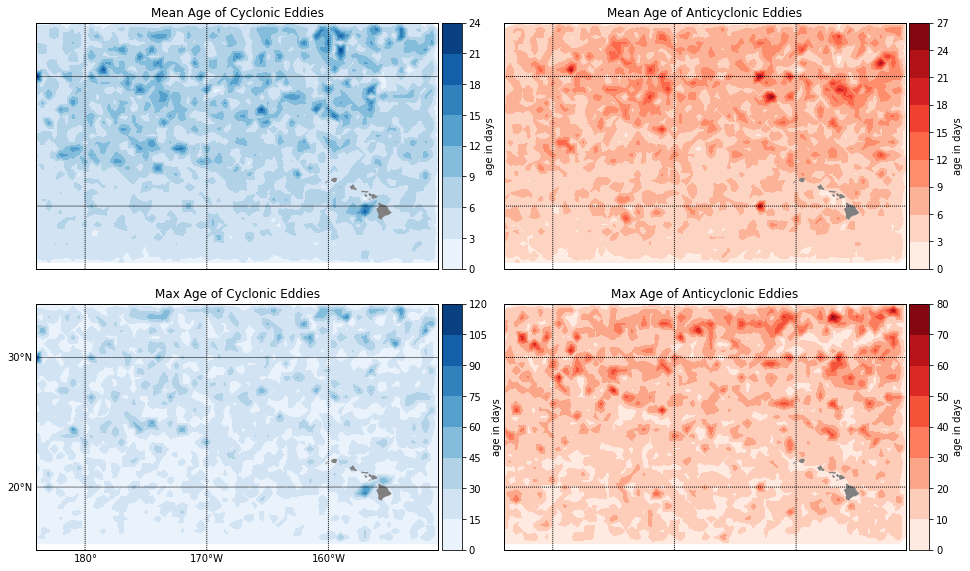

In [30]:
#Vis 7, borrowing from Vis 4

clat = list(cra['lat2'])
clon = list(cra['lon2'])
cage = list(cra['date'])

alat = list(ara['lat2'])
alon = list(ara['lon2'])
aage = list(ara['date'])

cmlat = list(cmax['lat2'])
cmlon = list(cmax['lon2'])
cmage = list(cmax['date'])

amlat = list(amax['lat2'])
amlon = list(amax['lon2'])
amage = list(amax['date'])


latmin = 15
latmax = 34
lonmin = 176
lonmax = 209
xi1, yi1 = np.mgrid[lonmin:lonmax:1000j, latmin:latmax:1000j]
zi1 = griddata((clon,clat),cage,(xi1,yi1),method='linear')
xi2, yi2 = np.mgrid[lonmin:lonmax:1000j, latmin:latmax:1000j]
zi2 = griddata((alon,alat),aage,(xi2,yi2),method='linear')
xi3, yi3 = np.mgrid[lonmin:lonmax:1000j, latmin:latmax:1000j]
zi3 = griddata((cmlon,cmlat),cmage,(xi3,yi3),method='linear')
xi4, yi4 = np.mgrid[lonmin:lonmax:1000j, latmin:latmax:1000j]
zi4 = griddata((amlon,amlat),amage,(xi4,yi4),method='linear')


plt.figure(figsize=(16,10))
gs=gridspec.GridSpec(2,2)
gs.update(wspace=.1,hspace=.07)

ax1 = plt.subplot(gs[0,0])
m = Basemap(projection='mill',llcrnrlat=latmin,urcrnrlat=latmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='h')
# changing resolution to 'f' gives full resolution
m.drawmapboundary()
m.fillcontinents(color='grey', lake_color='lightcyan')
m.drawparallels(np.arange(-90.,120.,10), labels=[False,False,False,False])
m.drawmeridians(np.arange(0.,420.,10), labels=[False,False,False,False])

x1,y1=m(xi1,yi1)
m.contourf(x1,y1,zi1,cmap='Blues')
plt.title('Mean Age of Cyclonic Eddies')
div1 = make_axes_locatable(ax1)
cax1 = div1.append_axes('right',size='5%',pad=.05)
plt.colorbar(label='age in days', orientation='vertical',cax=cax1)


ax2 = plt.subplot(gs[0,1])
m = Basemap(projection='mill',llcrnrlat=latmin,urcrnrlat=latmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='h')
# changing resolution to 'f' gives full resolution
m.drawmapboundary()
m.fillcontinents(color='grey', lake_color='lightcyan')
m.drawparallels(np.arange(-90.,120.,10), labels=[False,False,False,False])
m.drawmeridians(np.arange(0.,420.,10), labels=[False,False,False,False])

x2,y2=m(xi2,yi2)
m.contourf(x2,y2,zi2,cmap='Reds')
plt.title('Mean Age of Anticyclonic Eddies')
div2 = make_axes_locatable(ax2)
cax2 = div2.append_axes('right',size='5%',pad=.05)
plt.colorbar(label='age in days', orientation='vertical',cax=cax2)


ax3 = plt.subplot(gs[1,0])
m = Basemap(projection='mill',llcrnrlat=latmin,urcrnrlat=latmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='h')
# changing resolution to 'f' gives full resolution
m.drawmapboundary()
m.fillcontinents(color='grey', lake_color='lightcyan')
m.drawparallels(np.arange(-90.,120.,10), labels=[True,False,False,False])
m.drawmeridians(np.arange(0.,420.,10), labels=[False,False,False,True])

x3,y3=m(xi3,yi3)
m.contourf(x3,y3,zi3,cmap='Blues')
plt.title('Max Age of Cyclonic Eddies')
div3 = make_axes_locatable(ax3)
cax3 = div3.append_axes('right',size='5%',pad=.05)
plt.colorbar(label='age in days', orientation='vertical', cax=cax3)


ax4 = plt.subplot(gs[1,1])
m = Basemap(projection='mill',llcrnrlat=latmin,urcrnrlat=latmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='h')
# changing resolution to 'f' gives full resolution
m.drawmapboundary()
m.fillcontinents(color='grey', lake_color='lightcyan')
m.drawparallels(np.arange(-90.,120.,10), labels=[False,False,False,False])
m.drawmeridians(np.arange(0.,420.,10), labels=[False,False,False,False])

x4,y4=m(xi4,yi4)
m.contourf(x4,y4,zi4,cmap='Reds')
plt.title('Max Age of Anticyclonic Eddies')
div4 = make_axes_locatable(ax4)
cax4 = div4.append_axes('right',size='5%',pad=.05)
plt.colorbar(label='age in days', orientation='vertical',cax=cax4)


plt.savefig('vis7-contour-half-degree.png')
plt.show()


### Quarter Degree (.25) Precision

In [32]:
clldf = pd.read_csv('./data/cll250.csv')
alldf = pd.read_csv('./data/all250.csv')

In [33]:
clldf.head() #clldf is now half degree precision.

,eddy,latlon,eddy.1,date,lat,lon,lat2,lon2,radius,amplitude
0,1.0,"(26.5, 201.25)",1.0,4,26.594625,201.284855,26.50,201.25,20.287500,0.601725
1,2.0,"(30.5, 176.75)",2.0,4,30.710968,176.861229,30.50,176.75,40.200000,6.022315
2,2.0,"(30.5, 177.0)",2.0,8,30.640117,177.118954,30.50,177.00,25.706250,3.479141
3,2.0,"(30.5, 177.25)",2.0,2,30.698187,177.284744,30.50,177.25,24.000000,3.004032
4,2.0,"(30.75, 176.5)",2.0,6,30.854144,176.623599,30.75,176.50,40.366667,5.973732


In [34]:
alldf.head()

,eddy,latlon,eddy.1,date,lat,lon,lat2,lon2,radius,amplitude
0,1.0,"(16.5, 201.25)",1.0,2,16.616411,201.399742,16.50,201.25,29.925000,0.369896
1,1.0,"(16.5, 201.5)",1.0,3,16.666604,201.603012,16.50,201.50,33.283333,0.420860
2,1.0,"(16.5, 201.75)",1.0,1,16.711275,201.793015,16.50,201.75,30.550000,0.327685
3,2.0,"(19.75, 207.25)",2.0,4,19.908663,207.378414,19.75,207.25,32.012500,0.569734
4,2.0,"(19.75, 207.5)",2.0,6,19.839035,207.603783,19.75,207.50,26.700000,0.664782


In [35]:
crares = clldf.groupby('latlon') #creates a dataframe to make a heatmap for radius and amplitude for each bin
cra = crares.agg({
    'lat2':'first',
    'lon2':'first',
    'radius':np.mean,
    'amplitude':np.mean,
    'date':np.mean
})

In [36]:
arares = alldf.groupby('latlon') #creates a dataframe to make a heatmap for radius and amplitude for each bin
ara = arares.agg({
    'lat2':'first',
    'lon2':'first',
    'radius':np.mean,
    'amplitude':np.mean,
    'date':np.mean
})

In [37]:
cmax = crares.agg({
    'lat2':'first',
    'lon2':'first',
    'date':np.max
})

amax = arares.agg({
    'lat2':'first',
    'lon2':'first',
    'date':np.max
})

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1704: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


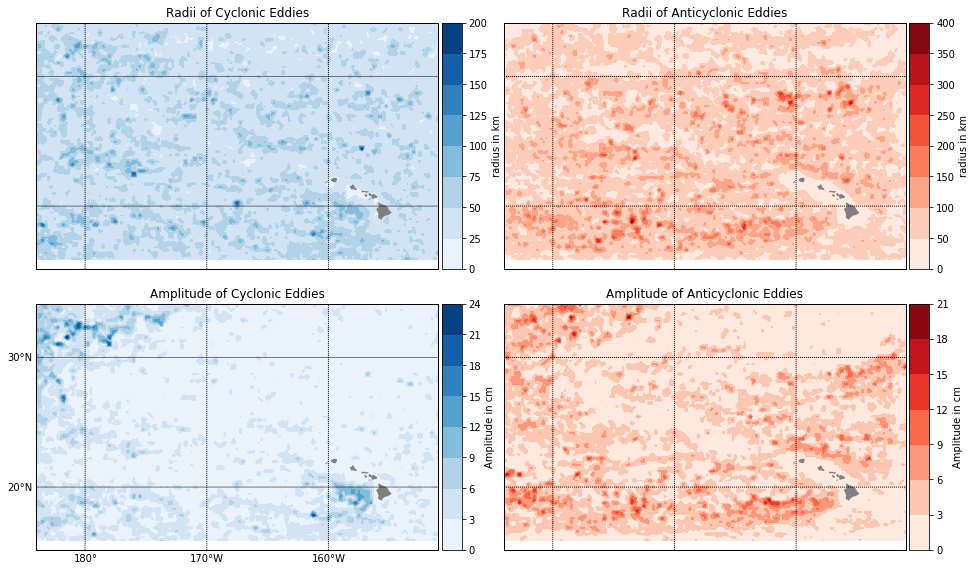

In [38]:
#testing smooth contour
#Consolidating all 4 graphs

clat = list(cra['lat2'])
clon = list(cra['lon2'])
crad = list(cra['radius'])
camp = list(cra['amplitude'])

alat = list(ara['lat2'])
alon = list(ara['lon2'])
arad = list(ara['radius'])
aamp = list(ara['amplitude'])

latmin = 15
latmax = 34
lonmin = 176
lonmax = 209
xi1, yi1 = np.mgrid[lonmin:lonmax:1000j, latmin:latmax:1000j]
zi1 = griddata((clon,clat),crad,(xi1,yi1),method='linear')
xi2, yi2 = np.mgrid[lonmin:lonmax:1000j, latmin:latmax:1000j]
zi2 = griddata((alon,alat),arad,(xi2,yi2),method='linear')
xi3, yi3 = np.mgrid[lonmin:lonmax:1000j, latmin:latmax:1000j]
zi3 = griddata((clon,clat),camp,(xi3,yi3),method='linear')
xi4, yi4 = np.mgrid[lonmin:lonmax:1000j, latmin:latmax:1000j]
zi4 = griddata((alon,alat),aamp,(xi4,yi4),method='linear')


plt.figure(figsize=(16,10))
gs=gridspec.GridSpec(2,2)
gs.update(wspace=.1,hspace=.07)

ax1 = plt.subplot(gs[0,0])
m = Basemap(projection='mill',llcrnrlat=latmin,urcrnrlat=latmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='h')
# changing resolution to 'f' gives full resolution
m.drawmapboundary()
m.fillcontinents(color='grey', lake_color='lightcyan')
m.drawparallels(np.arange(-90.,120.,10), labels=[False,False,False,False])
m.drawmeridians(np.arange(0.,420.,10), labels=[False,False,False,False])

x1,y1=m(xi1,yi1)
m.contourf(x1,y1,zi1,cmap='Blues')
plt.title('Radii of Cyclonic Eddies')
div1 = make_axes_locatable(ax1)
cax1 = div1.append_axes('right',size='5%',pad=.05)
plt.colorbar(label='radius in km', orientation='vertical',cax=cax1)


ax2 = plt.subplot(gs[0,1])
m = Basemap(projection='mill',llcrnrlat=latmin,urcrnrlat=latmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='h')
# changing resolution to 'f' gives full resolution
m.drawmapboundary()
m.fillcontinents(color='grey', lake_color='lightcyan')
m.drawparallels(np.arange(-90.,120.,10), labels=[False,False,False,False])
m.drawmeridians(np.arange(0.,420.,10), labels=[False,False,False,False])

x2,y2=m(xi2,yi2)
m.contourf(x2,y2,zi2,cmap='Reds')
plt.title('Radii of Anticyclonic Eddies')
div2 = make_axes_locatable(ax2)
cax2 = div2.append_axes('right',size='5%',pad=.05)
plt.colorbar(label='radius in km', orientation='vertical',cax=cax2)


ax3 = plt.subplot(gs[1,0])
m = Basemap(projection='mill',llcrnrlat=latmin,urcrnrlat=latmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='h')
# changing resolution to 'f' gives full resolution
m.drawmapboundary()
m.fillcontinents(color='grey', lake_color='lightcyan')
m.drawparallels(np.arange(-90.,120.,10), labels=[True,False,False,False])
m.drawmeridians(np.arange(0.,420.,10), labels=[False,False,False,True])

x3,y3=m(xi3,yi3)
m.contourf(x3,y3,zi3,cmap='Blues')
plt.title('Amplitude of Cyclonic Eddies')
div3 = make_axes_locatable(ax3)
cax3 = div3.append_axes('right',size='5%',pad=.05)
plt.colorbar(label='Amplitude in cm', orientation='vertical', cax=cax3)


ax4 = plt.subplot(gs[1,1])
m = Basemap(projection='mill',llcrnrlat=latmin,urcrnrlat=latmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='h')
# changing resolution to 'f' gives full resolution
m.drawmapboundary()
m.fillcontinents(color='grey', lake_color='lightcyan')
m.drawparallels(np.arange(-90.,120.,10), labels=[False,False,False,False])
m.drawmeridians(np.arange(0.,420.,10), labels=[False,False,False,False])

x4,y4=m(xi4,yi4)
m.contourf(x4,y4,zi4,cmap='Reds')
plt.title('Amplitude of Anticyclonic Eddies')
div4 = make_axes_locatable(ax4)
cax4 = div4.append_axes('right',size='5%',pad=.05)
plt.colorbar(label='Amplitude in cm', orientation='vertical',spacing='proportional',cax=cax4)


plt.savefig('vis4-contour-quarter-degree.png')
plt.show()

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1704: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


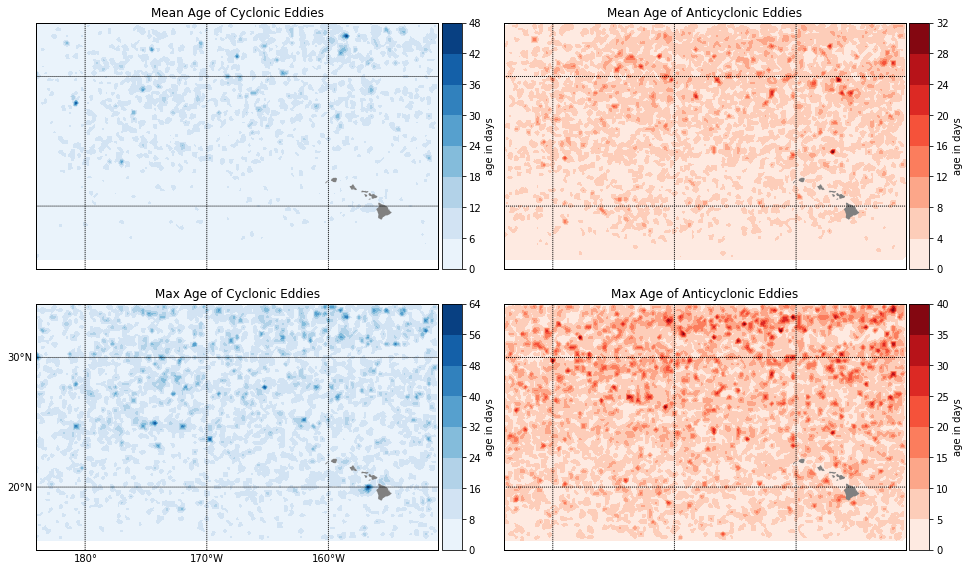

In [39]:
#Vis 7, borrowing from Vis 4

clat = list(cra['lat2'])
clon = list(cra['lon2'])
cage = list(cra['date'])

alat = list(ara['lat2'])
alon = list(ara['lon2'])
aage = list(ara['date'])

cmlat = list(cmax['lat2'])
cmlon = list(cmax['lon2'])
cmage = list(cmax['date'])

amlat = list(amax['lat2'])
amlon = list(amax['lon2'])
amage = list(amax['date'])


latmin = 15
latmax = 34
lonmin = 176
lonmax = 209
xi1, yi1 = np.mgrid[lonmin:lonmax:1000j, latmin:latmax:1000j]
zi1 = griddata((clon,clat),cage,(xi1,yi1),method='linear')
xi2, yi2 = np.mgrid[lonmin:lonmax:1000j, latmin:latmax:1000j]
zi2 = griddata((alon,alat),aage,(xi2,yi2),method='linear')
xi3, yi3 = np.mgrid[lonmin:lonmax:1000j, latmin:latmax:1000j]
zi3 = griddata((cmlon,cmlat),cmage,(xi3,yi3),method='linear')
xi4, yi4 = np.mgrid[lonmin:lonmax:1000j, latmin:latmax:1000j]
zi4 = griddata((amlon,amlat),amage,(xi4,yi4),method='linear')


plt.figure(figsize=(16,10))
gs=gridspec.GridSpec(2,2)
gs.update(wspace=.1,hspace=.07)

ax1 = plt.subplot(gs[0,0])
m = Basemap(projection='mill',llcrnrlat=latmin,urcrnrlat=latmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='h')
# changing resolution to 'f' gives full resolution
m.drawmapboundary()
m.fillcontinents(color='grey', lake_color='lightcyan')
m.drawparallels(np.arange(-90.,120.,10), labels=[False,False,False,False])
m.drawmeridians(np.arange(0.,420.,10), labels=[False,False,False,False])

x1,y1=m(xi1,yi1)
m.contourf(x1,y1,zi1,cmap='Blues')
plt.title('Mean Age of Cyclonic Eddies')
div1 = make_axes_locatable(ax1)
cax1 = div1.append_axes('right',size='5%',pad=.05)
plt.colorbar(label='age in days', orientation='vertical',cax=cax1)


ax2 = plt.subplot(gs[0,1])
m = Basemap(projection='mill',llcrnrlat=latmin,urcrnrlat=latmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='h')
# changing resolution to 'f' gives full resolution
m.drawmapboundary()
m.fillcontinents(color='grey', lake_color='lightcyan')
m.drawparallels(np.arange(-90.,120.,10), labels=[False,False,False,False])
m.drawmeridians(np.arange(0.,420.,10), labels=[False,False,False,False])

x2,y2=m(xi2,yi2)
m.contourf(x2,y2,zi2,cmap='Reds')
plt.title('Mean Age of Anticyclonic Eddies')
div2 = make_axes_locatable(ax2)
cax2 = div2.append_axes('right',size='5%',pad=.05)
plt.colorbar(label='age in days', orientation='vertical',cax=cax2)


ax3 = plt.subplot(gs[1,0])
m = Basemap(projection='mill',llcrnrlat=latmin,urcrnrlat=latmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='h')
# changing resolution to 'f' gives full resolution
m.drawmapboundary()
m.fillcontinents(color='grey', lake_color='lightcyan')
m.drawparallels(np.arange(-90.,120.,10), labels=[True,False,False,False])
m.drawmeridians(np.arange(0.,420.,10), labels=[False,False,False,True])

x3,y3=m(xi3,yi3)
m.contourf(x3,y3,zi3,cmap='Blues')
plt.title('Max Age of Cyclonic Eddies')
div3 = make_axes_locatable(ax3)
cax3 = div3.append_axes('right',size='5%',pad=.05)
plt.colorbar(label='age in days', orientation='vertical', cax=cax3)


ax4 = plt.subplot(gs[1,1])
m = Basemap(projection='mill',llcrnrlat=latmin,urcrnrlat=latmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='h')
# changing resolution to 'f' gives full resolution
m.drawmapboundary()
m.fillcontinents(color='grey', lake_color='lightcyan')
m.drawparallels(np.arange(-90.,120.,10), labels=[False,False,False,False])
m.drawmeridians(np.arange(0.,420.,10), labels=[False,False,False,False])

x4,y4=m(xi4,yi4)
m.contourf(x4,y4,zi4,cmap='Reds')
plt.title('Max Age of Anticyclonic Eddies')
div4 = make_axes_locatable(ax4)
cax4 = div4.append_axes('right',size='5%',pad=.05)
plt.colorbar(label='age in days', orientation='vertical',cax=cax4)


plt.savefig('vis7-contour-quarter-degree.png')
plt.show()
